In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras import models
from tensorflow.keras.applications import VGG19 as vgg19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [2]:
from tensorflow import keras
import tensorflow as tf
from keras import models
import tensorflow_datasets as tfds
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import img_to_array
from math import pi, sqrt, exp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import cv2 as cv2
import copy
import sklearn.metrics
from sklearn.linear_model import Ridge
import math
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import skimage.segmentation as ss
from skimage.segmentation import mark_boundaries as sb

In [3]:
train = pd.read_csv('train_labels.csv')
train.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [4]:
train['id'] = train['id'].apply(lambda x:f'{x}.tif')
train.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835.tif,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77.tif,1
2,755db6279dae599ebb4d39a9123cce439965282d.tif,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08.tif,0
4,068aba587a4950175d04c680d38943fd488d6a9d.tif,0


In [5]:
train_df, valid_df = train_test_split(train, test_size=0.3, random_state=0, stratify=train['label'])
print(f'shape of training data: {train_df.shape}')
print(f'shape of validation set: {valid_df.shape}')

shape of training data: (154017, 2)
shape of validation set: (66008, 2)


In [6]:
sample = valid_df.sample(30).reset_index()
sample

,index,id,label
0,72962,638bbd4effb28528449734f41577584f6c76825f.tif,1
1,202935,70de93140842f2e3d2f4f36562d376f898cc4eba.tif,0
2,144008,312f386a12a8eeef555ea989589990e3599c7434.tif,0
3,150058,5ae4845a1889fe58322c156d2271947d51185a9f.tif,0
4,99174,f5895319f1e36b4b306803e98f0f02684707bc12.tif,0
5,179233,cdb6346e0cab2147bb61127ae21c2842a39f22fa.tif,0
6,36580,af30563034ac7a425ab52f4b056c94a1063cd1c3.tif,1
7,147874,9b68d56c18a7d3c1fb9b975e937492f76f0a41f3.tif,1
8,47015,ff5d2e4f65a3ff9e08906edaa9f7a25c160466be.tif,0
9,83050,50b77858da242db4e94cc7aeb4db98361b71b83a.tif,0


In [7]:
sample_images = []
labels = []
for i, row in sample.iterrows():
    sample_images.append(mpimg.imread(f'C:\\Users\\hoori\\Desktop\\Histo-PCam\\train\\{row.id}'))
    labels.append(row.label)

In [8]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

In [9]:
BATCH_SIZE = 64
EPOCHS = 30
image_size = (96,96)

In [10]:
train_df['label'] = train_df['label'].astype(str)
valid_df['label'] = valid_df['label'].astype(str)
train_path = 'train'

train_loader = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    directory = train_path,
    x_col = 'id',
    y_col = 'label',
    batch_size = BATCH_SIZE,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = image_size
)

valid_loader = valid_datagen.flow_from_dataframe(
    dataframe = valid_df,
    directory = train_path,
    x_col = 'id',
    y_col = 'label',
    batch_size = BATCH_SIZE,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = image_size
)

Found 154015 validated image filenames belonging to 2 classes.
Found 66008 validated image filenames belonging to 2 classes.


In [11]:
TR_STEPS = len(train_loader)
VA_STEPS = len(valid_loader)
print(TR_STEPS)
print(VA_STEPS)

2407
1032


In [12]:
model = models.load_model('vgg19_2')

In [13]:
n = 4
# sample image
test_image = sample_images[n]
test_image = test_image/255
actual_class = labels[n]
print('Shape of the sample image:', test_image.shape)
print('Actual class: ', actual_class)

Shape of the sample image: (96, 96, 3)
Actual class:  0


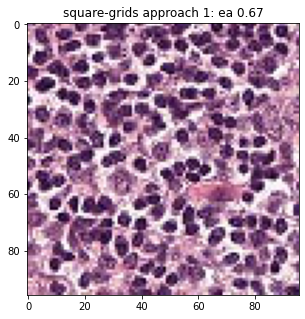

In [14]:
plt.figure(figsize=(5,5))
plt.title('square-grids approach 1: ea 0.67')
plt.imshow(test_image);

In [74]:
pred=model.predict(test_image[np.newaxis,...])
pred

array([[0.36627105, 0.6337289 ]], dtype=float32)

In [75]:
print(f'min value of test image: {np.min(test_image)}')
print(f'max value of test image: {np.max(test_image)}')

min value of test image: 0.0
max value of test image: 1.0


In [76]:
def n_top_classes(image):
    predicted_label = model.predict(image[np.newaxis,...])
    predicted_label = tf.squeeze(predicted_label).numpy()
    class_sorted = np.argsort(predicted_label)[::-1]
    for i, pred in enumerate(class_sorted):
        print("Top {} predicted class: {}  predicted_prob: {:.5f}"
              .format(i+1, class_sorted[i], predicted_label[pred]))
    return class_sorted[0], predicted_label[class_sorted[0]]

In [77]:
print("Sample image:")
top_class, predicted_prob = n_top_classes(test_image)

Sample image:
Top 1 predicted class: 1  predicted_prob: 0.63373
Top 2 predicted class: 0  predicted_prob: 0.36627


Multi-scale version of LIME

In [78]:
def s_slic(image, compactness, n_segments):
    superpixels = ss.slic(image.astype('double'), compactness=compactness, n_segments=n_segments)
    num_superpixels = np.unique(superpixels).shape[0]
    return superpixels, num_superpixels

#Create function to apply perturbations to images
def perturb_image(image, perturbation, segments):
    active_pixels = np.where(perturbation == 1)[0]
    mask = np.zeros(segments.shape)
    for active in active_pixels:
        mask[segments == active] = 1 
    perturbed_image = copy.deepcopy(image)
    perturbed_image = perturbed_image * mask[:,:,np.newaxis]
    return perturbed_image

def heatmap(active_features, coeff_features, superpixels):
    #active_pixels = np.where(active_features == 1)[0]
    active_pixels = np.where(coeff_features !=1)[0]
    mask_coeff = np.zeros(superpixels.shape)
    for active in active_pixels:
        mask_coeff[superpixels == active] = coeff_features[active]
    heatmap =  mask_coeff[:,:]
    return heatmap

def xai_lime(image, superpixels, num_superpixels, class_explain):
# Parameters
    num_perturbations = 10 * num_superpixels
    #num_top_features = num_superpixels
    num_top_features = math.ceil(0.4*num_superpixels)
    predictions = []
    kernel_width = 0.25
    simpler_model = Ridge(alpha=0)   
    perturbations = np.random.binomial(1, 0.5, size=(num_perturbations, num_superpixels))

    for p in perturbations:
        perturbed_image = perturb_image(image, p, superpixels)
        prediction = model.predict(perturbed_image[np.newaxis,...])
        predictions.append(prediction)
    predictions=np.array(predictions)

#Compute distances to original image
    original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
    distances = sklearn.metrics.pairwise_distances(perturbations, original_image, metric='cosine').ravel()

#Transform distances to a value between 0 and 1 (weights) using a kernel function
     
    weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function

#Estimate linear model
    class_to_explain = class_explain
    simpler_model.fit(X=perturbations, y=predictions[:,:,class_to_explain], sample_weight=weights)
    coeff = simpler_model.coef_[0]

#Use coefficients from linear model to extract top features
    top_features = np.argsort(coeff)[-num_top_features:] 
    features = np.zeros(num_superpixels) 
    features[top_features]= True #Activate top superpixels
    resutls_xai = perturb_image(image, features, superpixels)
    return weights, perturbations, predictions, resutls_xai, num_top_features, features, coeff

In [79]:
seg1, n_seg1 = s_slic(test_image, 20,16)
seg2, n_seg2 = s_slic(test_image, 20,25)
seg3, n_seg3 = s_slic(test_image, 20,36)
seg4, n_seg4 = s_slic(test_image, 20,49)
seg5, n_seg5 = s_slic(test_image, 20,64)
seg6, n_seg6 = s_slic(test_image, 20,81)
seg7, n_seg7 = s_slic(test_image, 20,100)
seg8, n_seg8 = s_slic(test_image, 20,121)
seg9, n_seg9 = s_slic(test_image, 20,144)
seg10, n_seg10 = s_slic(test_image, 20,169)
seg11, n_seg11 = s_slic(test_image, 20,196)
seg12, n_seg12 = s_slic(test_image, 20,225)
seg13, n_seg13 = s_slic(test_image, 20,256)
seg14, n_seg14 = s_slic(test_image, 20,289)
seg15, n_seg15 = s_slic(test_image, 20,324)
seg16, n_seg16 = s_slic(test_image, 20,361)
seg17, n_seg17 = s_slic(test_image, 20,400)

In [80]:
segments = [16,25,36,49,64,81,100,121,144,169,196,225,256,289,324,361,400]
sqr_segments = np.sqrt(segments)

num_segments = [n_seg1,n_seg2,n_seg3,n_seg4,n_seg5,n_seg6,n_seg7,n_seg8,
               n_seg9,n_seg10,n_seg11,n_seg12,n_seg13,n_seg14,n_seg15,n_seg16,n_seg17]

multi_scale = pd.DataFrame(data=[segments,num_segments],
                              columns=sqr_segments,
                              index=['Desired num of segments',
                                     'num of segmnets']).rename_axis('Square root of desired number of segments',axis='columns')
multi_scale

Square root of desired number of segments,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
Desired num of segments,16,25,36,49,64,81,100,121,144,169,196,225,256,289,324,361,400
num of segmnets,8,15,21,31,39,52,73,84,110,165,165,219,219,227,336,336,336


In [81]:
weights1, samples1, predicted_probs1, seg1_slic, top_f_seg1, features_seg1, coeff_seg1 = xai_lime(test_image, seg1, n_seg1, top_class)
weights2, samples2, predicted_probs2, seg2_slic, top_f_seg2, features_seg2, coeff_seg2 = xai_lime(test_image, seg2, n_seg2, top_class)
weights3, samples3, predicted_probs3, seg3_slic, top_f_seg3, features_seg3, coeff_seg3 = xai_lime(test_image, seg3, n_seg3, top_class)
weights4, samples4, predicted_probs4, seg4_slic, top_f_seg4, features_seg4, coeff_seg4 = xai_lime(test_image, seg4, n_seg4, top_class)
weights5, samples5, predicted_probs5, seg5_slic, top_f_seg5, features_seg5, coeff_seg5 = xai_lime(test_image, seg5, n_seg5, top_class)
weights6, samples6, predicted_probs6, seg6_slic, top_f_seg6, features_seg6, coeff_seg6 = xai_lime(test_image, seg6, n_seg6, top_class)
weights7, samples7, predicted_probs7, seg7_slic, top_f_seg7, features_seg7, coeff_seg7 = xai_lime(test_image, seg7, n_seg7, top_class)
weights8, samples8, predicted_probs8, seg8_slic, top_f_seg8, features_seg8, coeff_seg8 = xai_lime(test_image, seg8, n_seg8, top_class)
weights9, samples9, predicted_probs9, seg9_slic, top_f_seg9, features_seg9, coeff_seg9 = xai_lime(test_image, seg9, n_seg9, top_class)
weights10, samples10, predicted_probs10, seg10_slic, top_f_seg10, features_seg10, coeff_seg10 = xai_lime(test_image, seg10, n_seg10, top_class)
weights11, samples11, predicted_probs11, seg11_slic, top_f_seg11, features_seg11, coeff_seg11 = xai_lime(test_image, seg11, n_seg11, top_class)
weights12, samples12, predicted_probs12, seg12_slic, top_f_seg12, features_seg12, coeff_seg12 = xai_lime(test_image, seg12, n_seg12, top_class)
weights13, samples13, predicted_probs13, seg13_slic, top_f_seg13, features_seg13, coeff_seg13 = xai_lime(test_image, seg13, n_seg13, top_class)
weights14, samples14, predicted_probs14, seg14_slic, top_f_seg14, features_seg14, coeff_seg14 = xai_lime(test_image, seg14, n_seg14, top_class)
weights15, samples15, predicted_probs15, seg15_slic, top_f_seg15, features_seg15, coeff_seg15 = xai_lime(test_image, seg15, n_seg15, top_class)
weights16, samples16, predicted_probs16, seg16_slic, top_f_seg16, features_seg16, coeff_seg16 = xai_lime(test_image, seg16, n_seg16, top_class)
weights17, samples17, predicted_probs17, seg17_slic, top_f_seg17, features_seg17, coeff_seg17 = xai_lime(test_image, seg17, n_seg17, top_class)

In [82]:
heatmap_seg1 = heatmap(features_seg1, coeff_seg1, seg1)
heatmap_seg2 = heatmap(features_seg2, coeff_seg2, seg2)
heatmap_seg3 = heatmap(features_seg3, coeff_seg3, seg3)
heatmap_seg4 = heatmap(features_seg4, coeff_seg4, seg4)
heatmap_seg5 = heatmap(features_seg5, coeff_seg5, seg5)
heatmap_seg6 = heatmap(features_seg6, coeff_seg6, seg6)
heatmap_seg7 = heatmap(features_seg7, coeff_seg7, seg7)
heatmap_seg8 = heatmap(features_seg8, coeff_seg8, seg8)
heatmap_seg9 = heatmap(features_seg9, coeff_seg9, seg9)
heatmap_seg10 = heatmap(features_seg10, coeff_seg10, seg10)
heatmap_seg11 = heatmap(features_seg11, coeff_seg11, seg11)
heatmap_seg12 = heatmap(features_seg12, coeff_seg12, seg12)
heatmap_seg13 = heatmap(features_seg13, coeff_seg13, seg13)
heatmap_seg14 = heatmap(features_seg14, coeff_seg14, seg14)
heatmap_seg15 = heatmap(features_seg15, coeff_seg15, seg15)
heatmap_seg16 = heatmap(features_seg16, coeff_seg16, seg16)
heatmap_seg17 = heatmap(features_seg17, coeff_seg17, seg17)

In [83]:
multi_heatmaps = [heatmap_seg1,heatmap_seg2,heatmap_seg3,heatmap_seg4,
                  heatmap_seg5,heatmap_seg6,heatmap_seg7,heatmap_seg8,
                  heatmap_seg9,heatmap_seg10,heatmap_seg11,heatmap_seg12,
                 heatmap_seg13,heatmap_seg14,heatmap_seg15,heatmap_seg16,heatmap_seg17]

coefficients = [coeff_seg1,coeff_seg2,coeff_seg3,coeff_seg4,coeff_seg5,coeff_seg6,
               coeff_seg7,coeff_seg8,coeff_seg9,coeff_seg10,coeff_seg11,coeff_seg12,
               coeff_seg13,coeff_seg14,coeff_seg15,coeff_seg16,coeff_seg17]

In [84]:
min_coef = []
max_coef = []
for i in range(len(coefficients)):
    min_coef.append(np.min(coefficients[i]))
    max_coef.append(np.max(coefficients[i]))
    
negative=[]
positive=[]
for i in range(len(coefficients)):
    positive.append(np.count_nonzero(coefficients[i]>0))
    negative.append(np.count_nonzero(coefficients[i]<0))
coefficients_df = pd.DataFrame(data=[positive,negative,segments,num_segments],
                              columns=sqr_segments,
                              index=['Positive','Negative',
                                     'Desired num of segments',
                                     'Num of segmnets']).rename_axis('Sqr of desired num of segments',axis='columns')
coefficients_df

Sqr of desired num of segments,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
Positive,8,15,19,27,31,36,52,57,75,110,114,132,131,146,214,196,205
Negative,0,0,2,4,8,16,21,27,35,55,51,87,88,81,122,140,131
Desired num of segments,16,25,36,49,64,81,100,121,144,169,196,225,256,289,324,361,400
Num of segmnets,8,15,21,31,39,52,73,84,110,165,165,219,219,227,336,336,336


In [85]:
#### Normalizing heatmaps
for i in range(len(multi_heatmaps)):
    multi_heatmaps[i] = (multi_heatmaps[i]-np.min(multi_heatmaps[i]))/(np.max(multi_heatmaps[i])-np.min(multi_heatmaps[i]))
#### Min and Max values per heatmap after normalization
min_val = []
max_val = []
for i in range(len(multi_heatmaps)):
    min_val.append(np.min(multi_heatmaps[i]))
    max_val.append(np.max(multi_heatmaps[i]))
heatmaps_val = pd.DataFrame(data=[min_val, max_val], 
                            columns=num_segments,
                            index=['Min','Max']).rename_axis('Heatmaps',axis='columns')

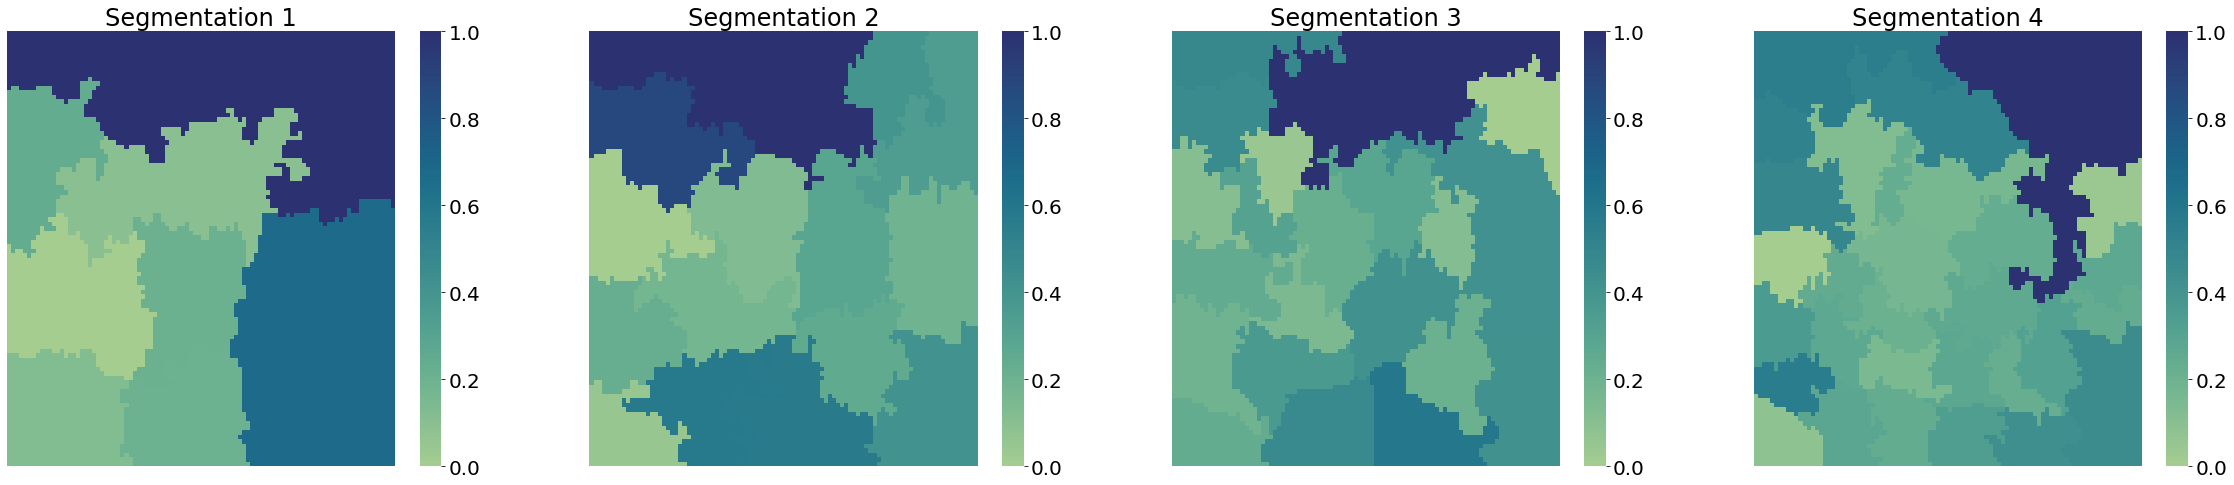

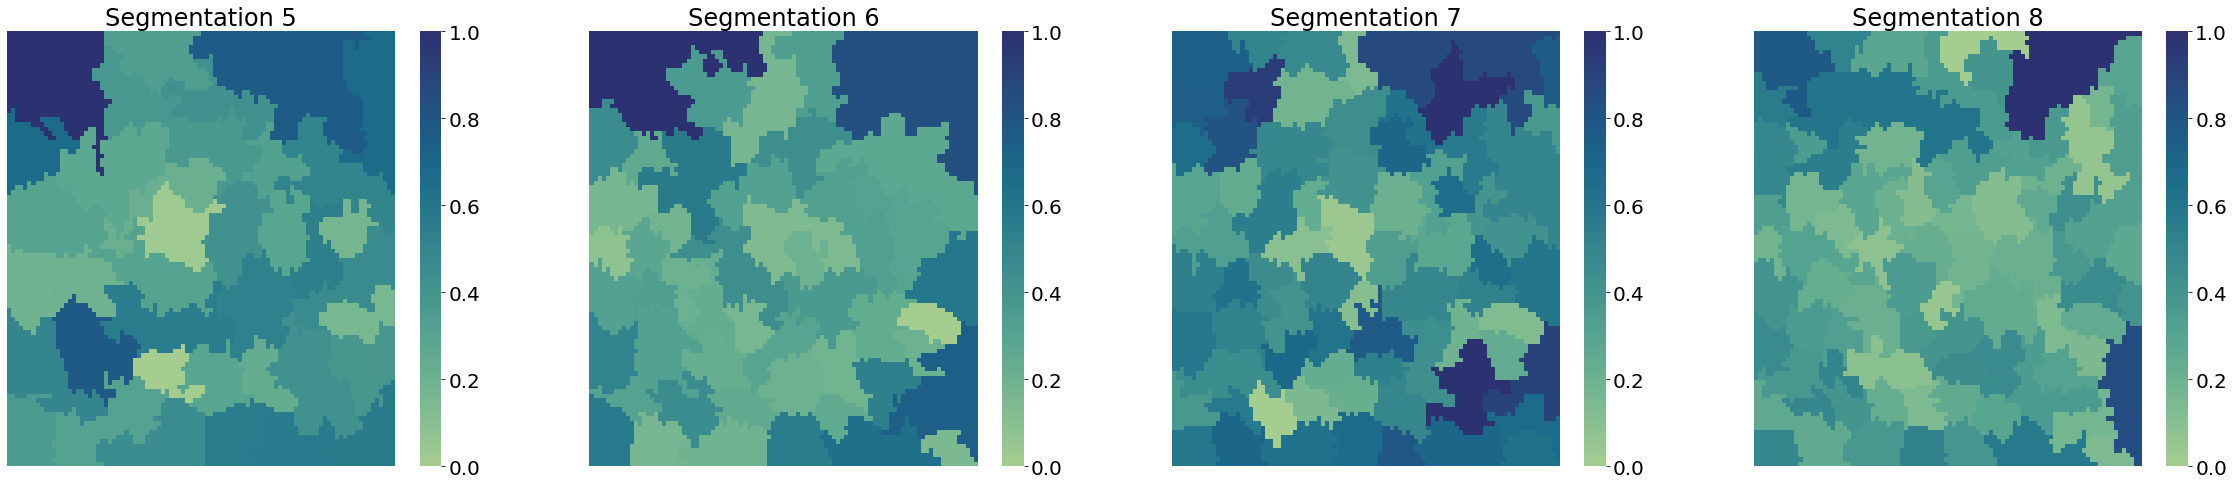

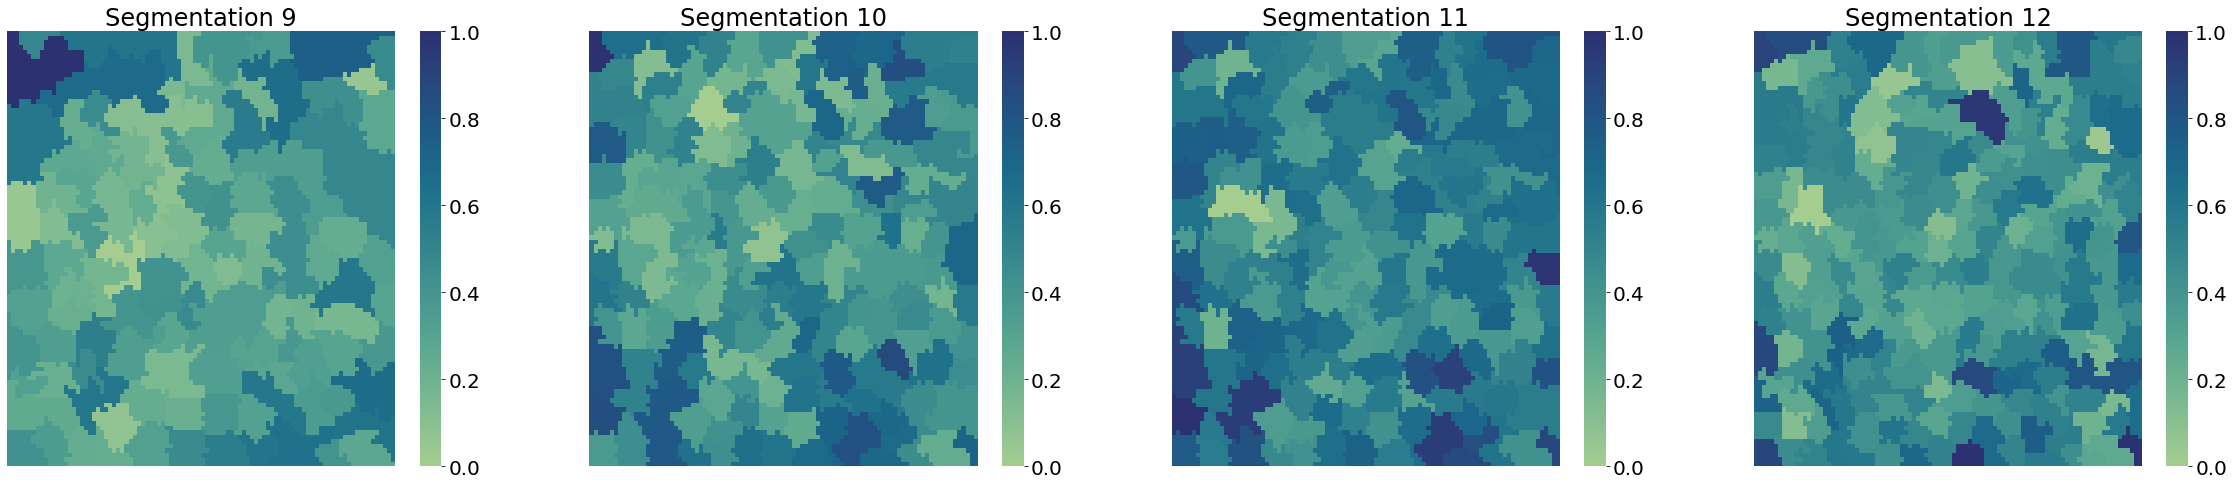

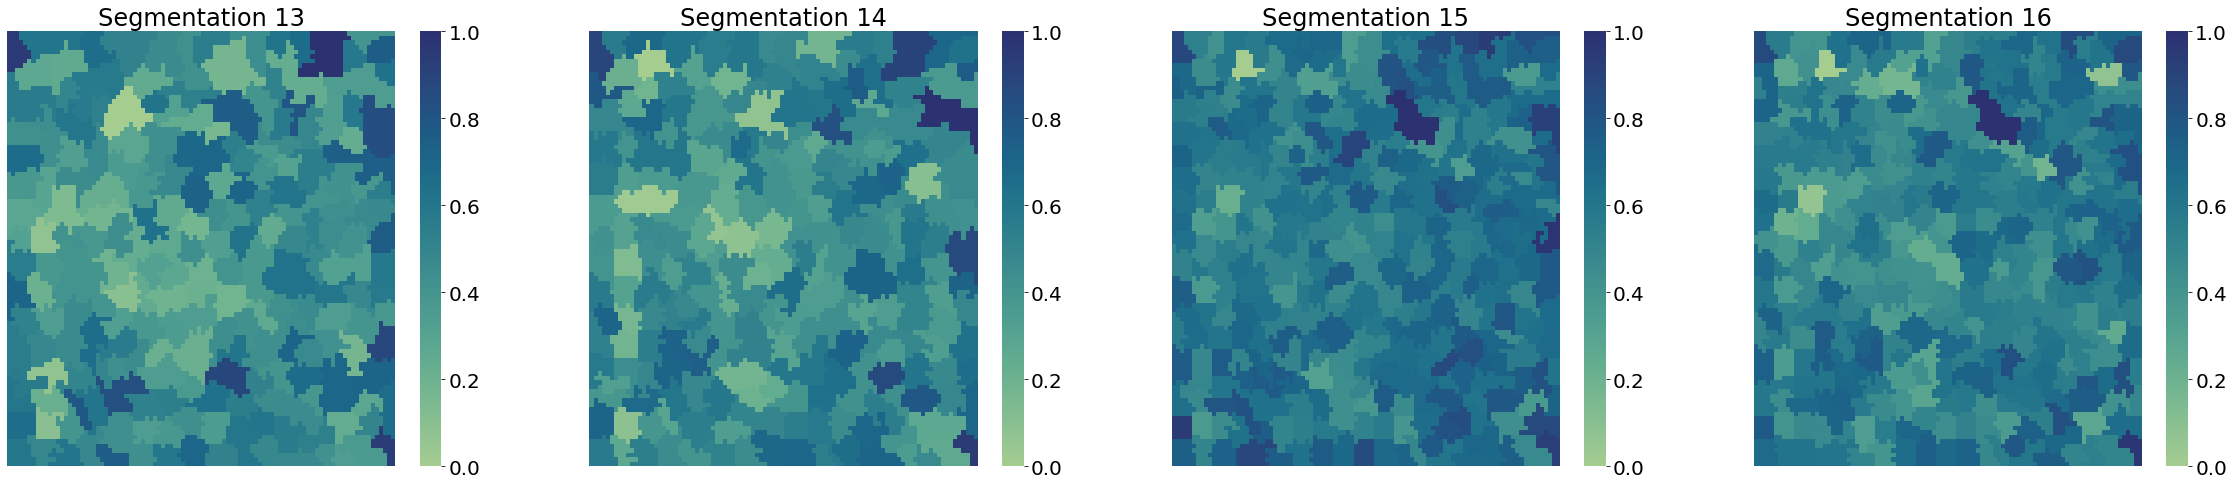

In [86]:
rcParams['figure.figsize'] = (40,8)
plt.rcParams["font.size"] = 20
f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,sharey=True)
h1 = sns.heatmap(multi_heatmaps[0],cmap='crest',cbar=True,ax=ax1)
h1.set_title('Segmentation 1')
h1.axis('off')
h2 = sns.heatmap(multi_heatmaps[1],cmap='crest',cbar=True,ax=ax2)
h2.set_title('Segmentation 2')
h2.axis('off')
h3 = sns.heatmap(multi_heatmaps[2],cmap='crest',cbar=True,ax=ax3)
h3.set_title('Segmentation 3')
h3.axis('off')
h4 = sns.heatmap(multi_heatmaps[3],cmap='crest',cbar=True,ax=ax4)
h4.set_title('Segmentation 4')
h4.axis('off')

f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,sharey=True)
h5 = sns.heatmap(multi_heatmaps[4],cmap='crest',cbar=True,ax=ax1)
h5.set_title('Segmentation 5')
h5.axis('off')
h6 = sns.heatmap(multi_heatmaps[5],cmap='crest',cbar=True,ax=ax2)
h6.set_title('Segmentation 6')
h6.axis('off')
h7 = sns.heatmap(multi_heatmaps[6],cmap='crest',cbar=True,ax=ax3)
h7.set_title('Segmentation 7')
h7.axis('off')
h8 = sns.heatmap(multi_heatmaps[7],cmap='crest',cbar=True,ax=ax4)
h8.set_title('Segmentation 8')
h8.axis('off')

f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,sharey=True)
h9 = sns.heatmap(multi_heatmaps[8],cmap='crest',cbar=True,ax=ax1)
h9.set_title('Segmentation 9')
h9.axis('off')
h10 = sns.heatmap(multi_heatmaps[9],cmap='crest',cbar=True,ax=ax2)
h10.set_title('Segmentation 10')
h10.axis('off')
h11 = sns.heatmap(multi_heatmaps[10],cmap='crest',cbar=True,ax=ax3)
h11.set_title('Segmentation 11')
h11.axis('off')
h12 = sns.heatmap(multi_heatmaps[11],cmap='crest',cbar=True,ax=ax4)
h12.set_title('Segmentation 12')
h12.axis('off')

f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,sharey=True)
h13 = sns.heatmap(multi_heatmaps[12],cmap='crest',cbar=True,ax=ax1)
h13.set_title('Segmentation 13')
h13.axis('off')
h14 = sns.heatmap(multi_heatmaps[13],cmap='crest',cbar=True,ax=ax2)
h14.set_title('Segmentation 14')
h14.axis('off')
h15 = sns.heatmap(multi_heatmaps[14],cmap='crest',cbar=True,ax=ax3)
h15.set_title('Segmentation 15')
h15.axis('off')
h16 = sns.heatmap(multi_heatmaps[15],cmap='crest',cbar=True,ax=ax4)
h16.set_title('Segmentation 16')
h16.axis('off');

In [88]:
interval_1 = []
interval_2 = []
sample_size = num_segments
sample_size_2 = [1/i for i in sample_size]


interval_1.append(sample_size[1]- sample_size[0])
interval_2.append(abs(sample_size_2[1] - sample_size_2[0]))

for i in range(1, len(sample_size)-1):
    interval_1.append(sample_size[i+1] - sample_size[i-1])
interval_1.append(sample_size[-1]-sample_size[-2])
sampling_ratio_1 = [i/(sum(interval_1)) for i in interval_1]
print(f'Approach 1: {sampling_ratio_1}')
print('\n')


for i in range(1, len(sample_size)-1):
    interval_2.append(sample_size_2[i+1] - sample_size_2[i-1])
interval_2.append(sample_size_2[-1]-sample_size_2[-2])
sampling_ratio_2 = [i/(sum(interval_2)) for i in interval_2]
print(f'Approach 2: {sampling_ratio_2}')
print('\n')

Approach 1: [0.010670731707317074, 0.019817073170731708, 0.024390243902439025, 0.027439024390243903, 0.03201219512195122, 0.051829268292682924, 0.04878048780487805, 0.056402439024390245, 0.12347560975609756, 0.08384146341463415, 0.08231707317073171, 0.08231707317073171, 0.012195121951219513, 0.17835365853658536, 0.16615853658536586, 0.0, 0.0]


Approach 2: [-0.4579439252336449, 0.6074766355140188, 0.2701236056677721, 0.17253774263120059, 0.10227035551123581, 0.09375338526535557, 0.05751258087706688, 0.036172763352381836, 0.04587935429056924, 0.023789294817332197, 0.011731707033204924, 0.011731707033204924, 0.0012633262590822673, 0.01248239662015107, 0.011219070361068801, -0.0, -0.0]




In [89]:
def weighted_heatmaps(weights, heatmaps):
    weighted_combination = 0
    for i in range(len(weights)):
        weighted_combination += weights[i]*(heatmaps[i])
    return weighted_combination

#### Weighted Explanations

heatmap_1 = weighted_heatmaps(sampling_ratio_1, multi_heatmaps)
heatmap_2 = weighted_heatmaps(sampling_ratio_2, multi_heatmaps)

heatmap_norm_1 = (heatmap_1-np.min(heatmap_1))/(np.max(heatmap_1)-np.min(heatmap_1))
exp_1 = cv2.addWeighted(heatmap_norm_1.astype('float64'),0.5,
                                                test_image[:,:,0].astype('float64'),0.5,0)

heatmap_norm_2 = (heatmap_2-np.min(heatmap_2))/(np.max(heatmap_2)-np.min(heatmap_2))
exp_2 = cv2.addWeighted(heatmap_norm_2.astype('float64'),0.5,
                                                test_image[:,:,0].astype('float64'),0.5,0)

Localization of traditional LIME vs multi-scale version

In [90]:
superpixels_lime = ss.slic(test_image)
num_superpixels_lime = np.unique(superpixels_lime).shape[0]

weights_lime, samples_lime, predicted_probs_lime, seg_slic_lime, top_f_lime, features_lime, coeff_lime = xai_lime(test_image, superpixels_lime, num_superpixels_lime, top_class)
heatmap_lime = heatmap(features_lime, coeff_lime, superpixels_lime)

In [91]:
heatmap_lime_norm = (heatmap_lime-np.min(heatmap_lime))/(np.max(heatmap_lime-np.min(heatmap_lime)))
exp_lime = heatmap_lime_norm[...,np.newaxis] * test_image
exp_lime_superimposed = cv2.addWeighted(heatmap_lime_norm.astype('float64'),0.5,
                                                test_image[:,:,0].astype('float64'),0.5,0)

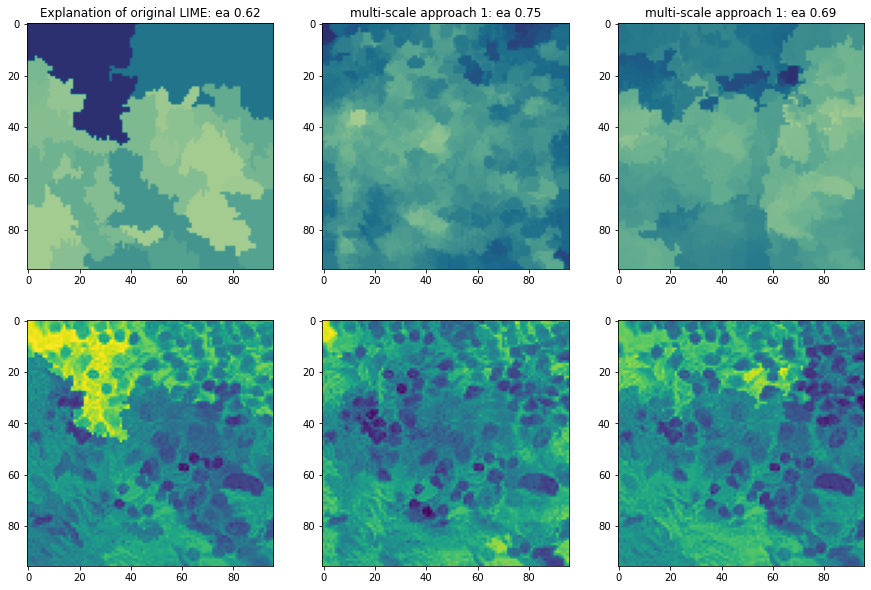

In [110]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
plt.rcParams["font.size"] = 10
ax = axes.ravel()
ax[0].imshow(heatmap_lime_norm, cmap='crest')
ax[0].set_title('Explanation of original LIME: ea 0.62')
ax[1].imshow(heatmap_norm_1, cmap='crest')
ax[1].set_title('multi-scale approach 1: ea 0.75')
ax[2].imshow(heatmap_norm_2, cmap='crest')
ax[2].set_title('multi-scale approach 1: ea 0.69')

ax[3].imshow(exp_lime_superimposed)
ax[4].imshow(exp_1);
ax[5].imshow(exp_2);

Explanation accuracy

In [93]:
exp_image_1 = test_image * heatmap_norm_1[..., np.newaxis]
exp_image_2 = test_image * heatmap_norm_2[..., np.newaxis]

In [94]:
print("sample image:")
top_class, predicted_prob = n_top_classes(test_image)
print('\n')
print("masked image with traditional LIME:")
top_class, predicted_prob = n_top_classes(exp_lime)
print('\n')
print("masked image from heat-maps 1:5:")
top_class, predicted_prob = n_top_classes(exp_image_1)
print('\n')
print("masked image from heat-maps 1:11:")
top_class, predicted_prob = n_top_classes(exp_image_2)

sample image:
Top 1 predicted class: 1  predicted_prob: 0.63373
Top 2 predicted class: 0  predicted_prob: 0.36627


masked image with traditional LIME:
Top 1 predicted class: 1  predicted_prob: 0.62675
Top 2 predicted class: 0  predicted_prob: 0.37325


masked image from heat-maps 1:5:
Top 1 predicted class: 1  predicted_prob: 0.75933
Top 2 predicted class: 0  predicted_prob: 0.24067


masked image from heat-maps 1:11:
Top 1 predicted class: 1  predicted_prob: 0.69283
Top 2 predicted class: 0  predicted_prob: 0.30717


Multi-scale vs square-grids

In [95]:
c = 200
seg1, n_seg1 = s_slic(test_image, c,16)
seg2, n_seg2 = s_slic(test_image, c,25)
seg3, n_seg3 = s_slic(test_image, c,36)
seg4, n_seg4 = s_slic(test_image, c,49)
seg5, n_seg5 = s_slic(test_image, c,64)
seg6, n_seg6 = s_slic(test_image, c,81)
seg7, n_seg7 = s_slic(test_image, c,100)
seg8, n_seg8 = s_slic(test_image, c,121)
seg9, n_seg9 = s_slic(test_image, c,144)
seg10, n_seg10 = s_slic(test_image, c,169)
seg11, n_seg11 = s_slic(test_image, c,196)
seg12, n_seg12 = s_slic(test_image, c,225)
seg13, n_seg13 = s_slic(test_image, c,256)
seg14, n_seg14 = s_slic(test_image, c,289)
seg15, n_seg15 = s_slic(test_image, c,324)
seg16, n_seg16 = s_slic(test_image, c,361)
seg17, n_seg17 = s_slic(test_image, c,400)

In [96]:
weights1, samples1, predicted_probs1, seg1_slic, top_f_seg1, features_seg1, coeff_seg1 = xai_lime(test_image, seg1, n_seg1, top_class)
weights2, samples2, predicted_probs2, seg2_slic, top_f_seg2, features_seg2, coeff_seg2 = xai_lime(test_image, seg2, n_seg2, top_class)
weights3, samples3, predicted_probs3, seg3_slic, top_f_seg3, features_seg3, coeff_seg3 = xai_lime(test_image, seg3, n_seg3, top_class)
weights4, samples4, predicted_probs4, seg4_slic, top_f_seg4, features_seg4, coeff_seg4 = xai_lime(test_image, seg4, n_seg4, top_class)
weights5, samples5, predicted_probs5, seg5_slic, top_f_seg5, features_seg5, coeff_seg5 = xai_lime(test_image, seg5, n_seg5, top_class)
weights6, samples6, predicted_probs6, seg6_slic, top_f_seg6, features_seg6, coeff_seg6 = xai_lime(test_image, seg6, n_seg6, top_class)
weights7, samples7, predicted_probs7, seg7_slic, top_f_seg7, features_seg7, coeff_seg7 = xai_lime(test_image, seg7, n_seg7, top_class)
weights8, samples8, predicted_probs8, seg8_slic, top_f_seg8, features_seg8, coeff_seg8 = xai_lime(test_image, seg8, n_seg8, top_class)
weights9, samples9, predicted_probs9, seg9_slic, top_f_seg9, features_seg9, coeff_seg9 = xai_lime(test_image, seg9, n_seg9, top_class)
weights10, samples10, predicted_probs10, seg10_slic, top_f_seg10, features_seg10, coeff_seg10 = xai_lime(test_image, seg10, n_seg10, top_class)
weights11, samples11, predicted_probs11, seg11_slic, top_f_seg11, features_seg11, coeff_seg11 = xai_lime(test_image, seg11, n_seg11, top_class)
weights12, samples12, predicted_probs12, seg12_slic, top_f_seg12, features_seg12, coeff_seg12 = xai_lime(test_image, seg12, n_seg12, top_class)
weights13, samples13, predicted_probs13, seg13_slic, top_f_seg13, features_seg13, coeff_seg13 = xai_lime(test_image, seg13, n_seg13, top_class)
weights14, samples14, predicted_probs14, seg14_slic, top_f_seg14, features_seg14, coeff_seg14 = xai_lime(test_image, seg14, n_seg14, top_class)
weights15, samples15, predicted_probs15, seg15_slic, top_f_seg15, features_seg15, coeff_seg15 = xai_lime(test_image, seg15, n_seg15, top_class)
weights16, samples16, predicted_probs16, seg16_slic, top_f_seg16, features_seg16, coeff_seg16 = xai_lime(test_image, seg16, n_seg16, top_class)
weights17, samples17, predicted_probs17, seg17_slic, top_f_seg17, features_seg17, coeff_seg17 = xai_lime(test_image, seg17, n_seg17, top_class)

In [97]:
heatmap_seg1_sq = heatmap(features_seg1, coeff_seg1, seg1)
heatmap_seg2_sq = heatmap(features_seg2, coeff_seg2, seg2)
heatmap_seg3_sq = heatmap(features_seg3, coeff_seg3, seg3)
heatmap_seg4_sq = heatmap(features_seg4, coeff_seg4, seg4)
heatmap_seg5_sq = heatmap(features_seg5, coeff_seg5, seg5)
heatmap_seg6_sq = heatmap(features_seg6, coeff_seg6, seg6)
heatmap_seg7_sq = heatmap(features_seg7, coeff_seg7, seg7)
heatmap_seg8_sq = heatmap(features_seg8, coeff_seg8, seg8)
heatmap_seg9_sq = heatmap(features_seg9, coeff_seg9, seg9)
heatmap_seg10_sq = heatmap(features_seg10, coeff_seg10, seg10)
heatmap_seg11_sq = heatmap(features_seg11, coeff_seg11, seg11)
heatmap_seg12_sq = heatmap(features_seg12, coeff_seg12, seg12)
heatmap_seg13_sq = heatmap(features_seg13, coeff_seg13, seg13)
heatmap_seg14_sq = heatmap(features_seg14, coeff_seg14, seg14)
heatmap_seg15_sq = heatmap(features_seg15, coeff_seg15, seg15)
heatmap_seg16_sq = heatmap(features_seg16, coeff_seg16, seg16)
heatmap_seg17_sq = heatmap(features_seg17, coeff_seg17, seg17)

In [98]:
multi_heatmaps_sq = [heatmap_seg1_sq,heatmap_seg2_sq,heatmap_seg3_sq,heatmap_seg4_sq,
                  heatmap_seg5_sq,heatmap_seg6_sq,heatmap_seg7_sq,heatmap_seg8_sq,
                  heatmap_seg9_sq,heatmap_seg10_sq,heatmap_seg11_sq,heatmap_seg12_sq,
                 heatmap_seg13_sq,heatmap_seg14_sq,heatmap_seg15_sq,heatmap_seg16_sq,heatmap_seg17_sq]

coefficients = [coeff_seg1,coeff_seg2,coeff_seg3,coeff_seg4,coeff_seg5,coeff_seg6,
               coeff_seg7,coeff_seg8,coeff_seg9,coeff_seg10,coeff_seg11,coeff_seg12,
               coeff_seg13,coeff_seg14,coeff_seg15,coeff_seg16,coeff_seg17]

#### Normalizing heatmaps
for i in range(len(multi_heatmaps_sq)):
    multi_heatmaps_sq[i] = (multi_heatmaps_sq[i]-np.min(multi_heatmaps_sq[i]))/(np.max(multi_heatmaps_sq[i])-np.min(multi_heatmaps_sq[i]))

Localization of traditional square-grids vs multi-scale version

In [99]:
num_segments_sq = [n_seg1,n_seg2,n_seg3,n_seg4,n_seg5,n_seg6,n_seg7,n_seg8,
               n_seg9,n_seg10,n_seg11,n_seg12,n_seg13,n_seg14,n_seg15,n_seg16,n_seg17]

In [100]:
interval_1 = []
interval_2 = []
sample_size = num_segments_sq
sample_size_2 = [1/i for i in sample_size]


interval_1.append(sample_size[1]- sample_size[0])
interval_2.append(abs(sample_size_2[1] - sample_size_2[0]))

for i in range(1, len(sample_size)-1):
    interval_1.append(sample_size[i+1] - sample_size[i-1])
interval_1.append(sample_size[-1]-sample_size[-2])
sampling_ratio_1 = [i/(sum(interval_1)) for i in interval_1]
print(f'Approach 1: {sampling_ratio_1}')
print('\n')


for i in range(1, len(sample_size)-1):
    interval_2.append(sample_size_2[i+1] - sample_size_2[i-1])
interval_2.append(sample_size_2[-1]-sample_size_2[-2])
sampling_ratio_2 = [i/(sum(interval_2)) for i in interval_2]
print(f'Approach 2: {sampling_ratio_2}')
print('\n')

Approach 1: [0.013043478260869565, 0.028985507246376812, 0.034782608695652174, 0.04057971014492753, 0.0463768115942029, 0.05217391304347826, 0.057971014492753624, 0.06376811594202898, 0.10869565217391304, 0.07536231884057971, 0.08695652173913043, 0.08695652173913043, 0.0, 0.15217391304347827, 0.15217391304347827, 0.0, 0.0]


Approach 2: [-0.3021763392857143, 0.4663215112433863, 0.26311953352769685, 0.16321252893518517, 0.10827964342703571, 0.07554408482142858, 0.05481097652814823, 0.041036292989418, 0.04247151561332917, 0.02474359039250621, 0.016059541841290083, 0.016059541841290083, -0.0, 0.0152587890625, 0.0152587890625, -0.0, -0.0]




In [101]:
#### Weighted Explanations

heatmap_1_sq = weighted_heatmaps(sampling_ratio_1, multi_heatmaps_sq)
heatmap_2_sq = weighted_heatmaps(sampling_ratio_2, multi_heatmaps_sq)

heatmap_norm_1_sq = (heatmap_1_sq-np.min(heatmap_1_sq))/(np.max(heatmap_1_sq)-np.min(heatmap_1_sq))
exp_1_sq = cv2.addWeighted(heatmap_norm_1_sq.astype('float64'),0.6,
                                                test_image[:,:,0].astype('float64'),0.4,0)

heatmap_norm_2_sq = (heatmap_2_sq-np.min(heatmap_2_sq))/(np.max(heatmap_2_sq)-np.min(heatmap_2_sq))
exp_2_sq = cv2.addWeighted(heatmap_norm_2_sq.astype('float64'),0.6,
                                                test_image[:,:,0].astype('float64'),0.4,0)

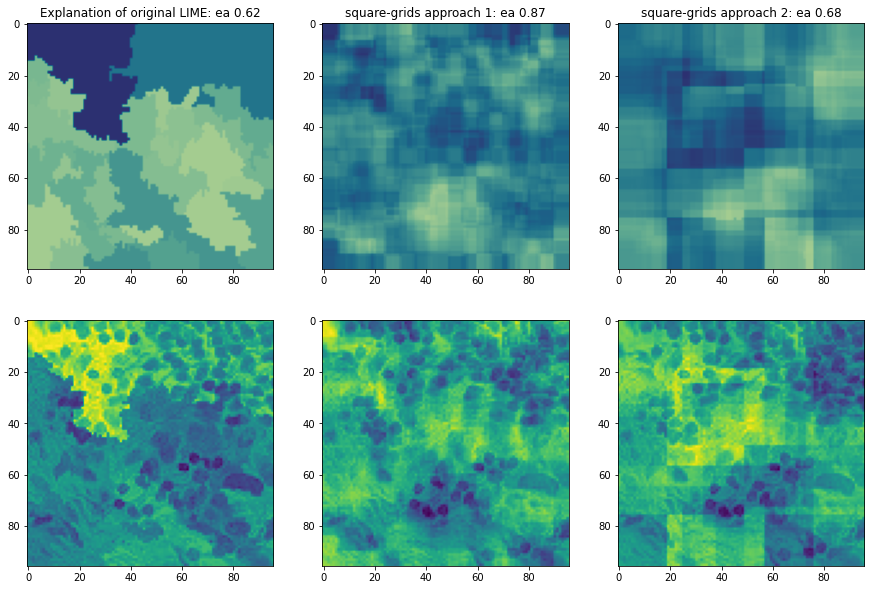

In [112]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
plt.rcParams["font.size"] = 10
ax = axes.ravel()
ax[0].imshow(heatmap_lime_norm, cmap='crest')
ax[0].set_title('Explanation of original LIME: ea 0.62')
ax[1].imshow(heatmap_1_sq, cmap='crest')
ax[1].set_title('square-grids approach 1: ea 0.87')
ax[2].imshow(heatmap_2_sq, cmap='crest')
ax[2].set_title('square-grids approach 2: ea 0.68')

ax[3].imshow(exp_lime_superimposed)
ax[4].imshow(exp_1_sq)
ax[5].imshow(exp_2_sq);

In [103]:
exp_image_1_sq = test_image * heatmap_norm_1_sq[..., np.newaxis]
exp_image_2_sq = test_image * heatmap_norm_2_sq[..., np.newaxis]

In [104]:
print("sample image:")
top_class, predicted_prob = n_top_classes(test_image)
print('\n')
print("masked image with traditional LIME:")
top_class, predicted_prob = n_top_classes(exp_lime)
print('\n')
print("masked image from approach 1:")
top_class, predicted_prob = n_top_classes(exp_image_1_sq)
print('\n')
print("masked image from approach 2:")
top_class, predicted_prob = n_top_classes(exp_image_2_sq)

sample image:
Top 1 predicted class: 1  predicted_prob: 0.63373
Top 2 predicted class: 0  predicted_prob: 0.36627


masked image with traditional LIME:
Top 1 predicted class: 1  predicted_prob: 0.62675
Top 2 predicted class: 0  predicted_prob: 0.37325


masked image from approach 1:
Top 1 predicted class: 1  predicted_prob: 0.87456
Top 2 predicted class: 0  predicted_prob: 0.12544


masked image from approach 2:
Top 1 predicted class: 1  predicted_prob: 0.68974
Top 2 predicted class: 0  predicted_prob: 0.31026
